In [548]:
import glob
import csv
import pandas as pd
import re
import seaborn as sns
sns.set()

In [549]:
results_folder = '../../results/aml_results/*.bam.depth.txt'
sra_run_table = '../../accession_lists/Public_AML_RNA_SraRunTable.txt'
filtered_csv = '../data_files/aml.normal.meta.filtered.csv'

In [550]:
def get_srr_accession(df):
    
    pattern = re.compile(r"[SE]RR[0-9]+")
    
    file = df['file_location']
    
    return re.search(pattern, file).group(0)

In [551]:
filtered_df = pd.read_csv(filtered_csv, index_col=0)

In [552]:
filtered_df['srr_acc'] = filtered_df.apply(get_srr_accession, axis=1)

In [553]:
filtered_dict = {}


for index, row in filtered_df.iterrows():
    
    filtered_dict[row['srr_acc']] = True

In [554]:
files = glob.glob(results_folder)


In [555]:
master_list = []

for file in files:
    
    name = str(file)
    
    with open(file, 'rt') as csvfile:
    
        spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
        for row in spamreader:
            
            record_list =[name[0]] + row
            
            master_list.append(record_list)

In [556]:
df = pd.DataFrame(columns=['file', 'transcript', 'pos', 'depth'], data=master_list)

In [557]:
df.head()

,file,transcript,pos,depth
0,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,1,0
1,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,2,0
2,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,3,0
3,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,4,0
4,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,5,0


In [558]:
def get_srr_accession(df):
    
    pattern = re.compile(r"[SE]RR[0-9]+")
    
    file = df['file']
    
    return re.search(pattern, file).group(0)

In [559]:
df['srr_acc'] = df.apply(get_srr_accession, axis=1)

In [560]:
df['transcript'].value_counts()

BETA_new_GEX_FAM         695324
Alpha_GEX_79k_dup_FAM    695324
Alpha_GEX_64k_HEX        695324
Name: transcript, dtype: int64

In [561]:
df.head()

,file,transcript,pos,depth,srr_acc
0,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,1,0,ERR1024259
1,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,2,0,ERR1024259
2,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,3,0,ERR1024259
3,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,4,0,ERR1024259
4,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,5,0,ERR1024259


In [562]:
meta_df = pd.read_csv(sra_run_table, sep='\t')

In [563]:
dict_mbase_map = {}


for index, row in meta_df.iterrows():
    
    dict_mbase_map[row['Run']] = row['MBases']

In [564]:
def normalise(df):
    
    mbases = dict_mbase_map[df['srr_acc']] 
    
    return mbases

In [565]:
df['mbases'] = df.apply(normalise, axis=1)

In [566]:
df['depth'] = df['depth'].astype(int)

df.head()

,file,transcript,pos,depth,srr_acc,mbases
0,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,1,0,ERR1024259,1629
1,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,2,0,ERR1024259,1629
2,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,3,0,ERR1024259,1629
3,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,4,0,ERR1024259,1629
4,../../results/aml_results/aml_aabspliced_ERR10...,Alpha_GEX_64k_HEX,5,0,ERR1024259,1629


In [567]:
df['normalise'] = df.apply(lambda x: x['depth'] / x['mbases'], axis=1)

In [568]:
def filter_df(df):
    
    if df['srr_acc'] in filtered_dict:
        
        return True
    
    else:
        
        return False
    
df['to_filter'] = df.apply(filter_df, axis=1)

In [569]:
df.shape

(2085972, 8)

In [570]:
df = df[df['to_filter'] == False]

In [571]:
alpha_wt = df[df['transcript']=='Alpha_GEX_64k_HEX']
alpha_dup = df[df['transcript']=='Alpha_GEX_79k_dup_FAM']
beta = df[df['transcript']=='BETA_new_GEX_FAM']

In [572]:
grouped_alphawt = alpha_wt.groupby('pos').sum()
grouped_alphadup = alpha_dup.groupby('pos').sum()
grouped_beta = beta.groupby('pos').sum()

In [573]:
grouped_alphawt['pos'] = grouped_alphawt.index
grouped_alphadup['pos'] = grouped_alphadup.index
grouped_beta['pos'] = grouped_beta.index

In [574]:
grouped_alphawt['pos'] = grouped_alphawt['pos'].astype(int)
grouped_alphadup['pos'] = grouped_alphadup['pos'].astype(int)
grouped_beta['pos'] = grouped_beta['pos'].astype(int)

In [575]:
grouped_alphawt = grouped_alphawt.sort_values('pos')
grouped_alphadup = grouped_alphadup.sort_values('pos')
grouped_beta = grouped_beta.sort_values('pos')

Text(0.5,1,'Coverage over Reference')

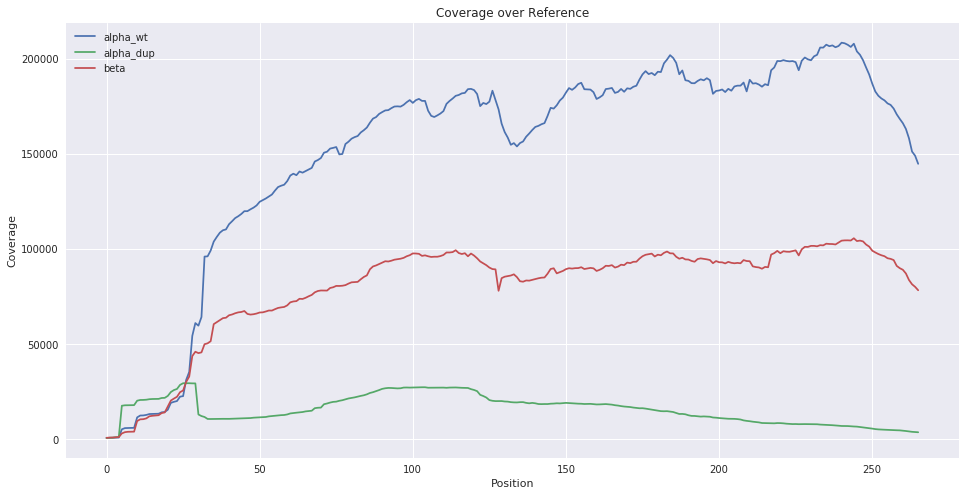

In [576]:
ax = grouped_alphawt.plot(x='pos', y='depth', use_index=False, figsize=(16,8))
grouped_alphadup.plot(x='pos', y='depth', ax=ax,use_index=False)
grouped_beta.plot(x='pos', y='depth', ax=ax,use_index=False)

ax.legend(["alpha_wt", "alpha_dup", 'beta'])
ax.set_xlabel('Position')
ax.set_ylabel('Coverage')
ax.set_title('Coverage over Reference')